## *Load and Clean Data*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [7]:
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')

# Standardize Date

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Quick Look

In [9]:
print(df.head())
print(df.info())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 14:30:54+00:00     A  
1 2020-06-03 14:45:20+00:00     A  
2 2020-05-26 08:30:07+00:00     

## *Descriptive Statistics (Headline Lengths)*

# Calculate headline length

In [10]:
df['headline_length'] = df['headline'].apply(len)

# Plot distribution

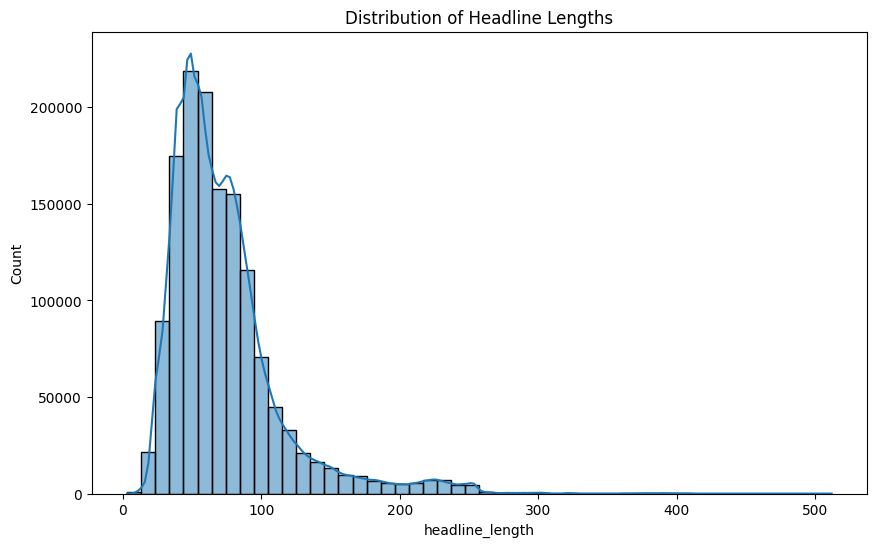

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.show()

print(df['headline_length'].describe())

## *Publisher Analysis*

# Count articles per publisher

In [12]:
publisher_counts = df['publisher'].value_counts().head(10)

# Plot

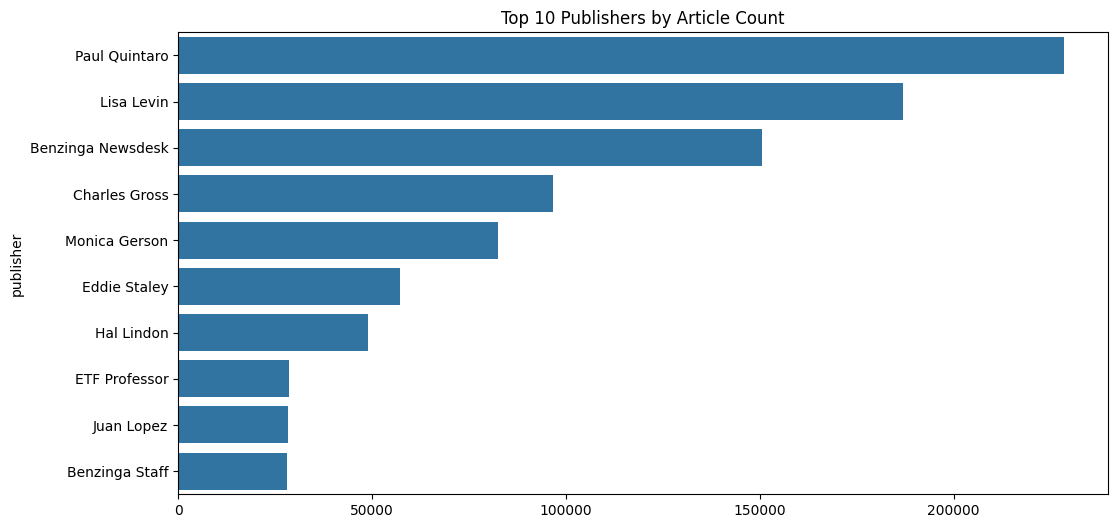

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title('Top 10 Publishers by Article Count')
plt.show()

## *Date Analysis*

# Extract day of week and hour

In [14]:
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Plot publication frequency over time

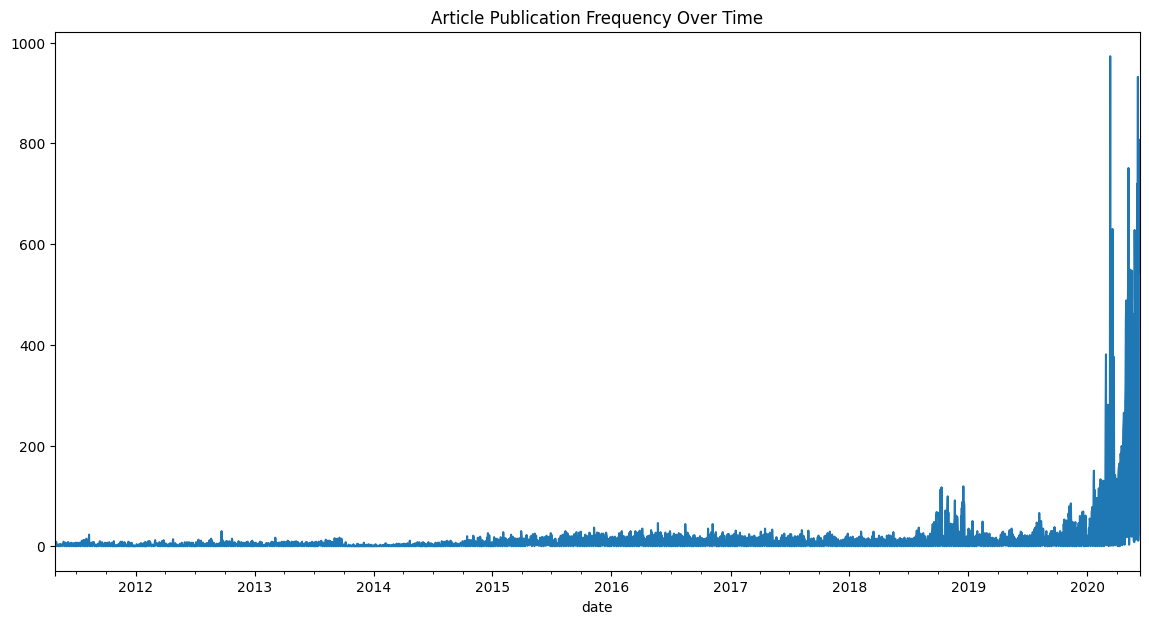

In [15]:
daily_counts = df.set_index('date').resample('D').count()['headline']
plt.figure(figsize=(14, 7))
daily_counts.plot()
plt.title('Article Publication Frequency Over Time')
plt.show()